In [5]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("MTA_CSV.csv", delimiter=',')

# Total Estimated Ridership over Time

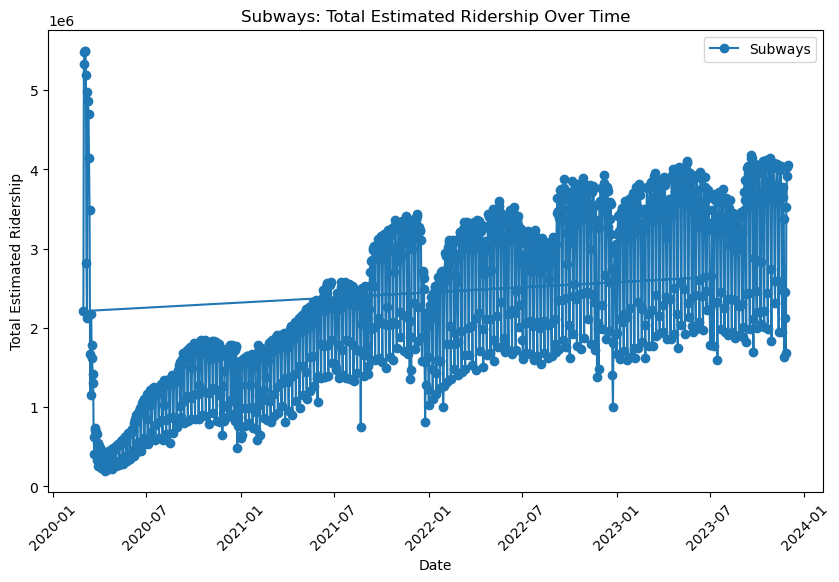

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Subways: Total Estimated Ridership'], marker='o', label='Subways')
plt.title('Subways: Total Estimated Ridership Over Time')
plt.xlabel('Date')
plt.ylabel('Total Estimated Ridership')
plt.legend()
plt.xticks(rotation=45)
plt.show()


# Bar Plot for Buses: % of Comparable Pre-Pandemic Day Over Time:

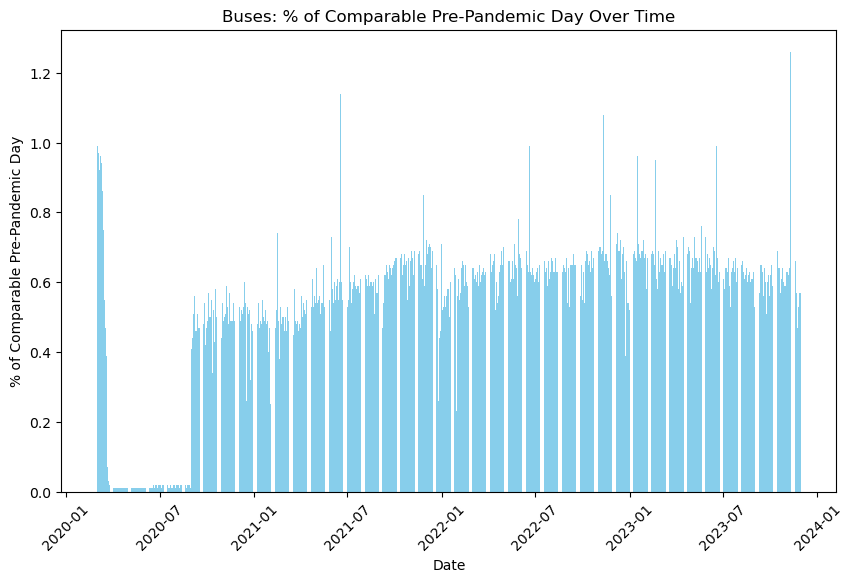

In [7]:
plt.figure(figsize=(10, 6))
plt.bar(df['Date'], df['Buses: % of Comparable Pre-Pandemic Day'], color='skyblue')
plt.title('Buses: % of Comparable Pre-Pandemic Day Over Time')
plt.xlabel('Date')
plt.ylabel('% of Comparable Pre-Pandemic Day')
plt.xticks(rotation=45)
plt.show()


# Scatter Plot for Bridges and Tunnels: Total Traffic vs. % of Comparable Pre-Pandemic Day:

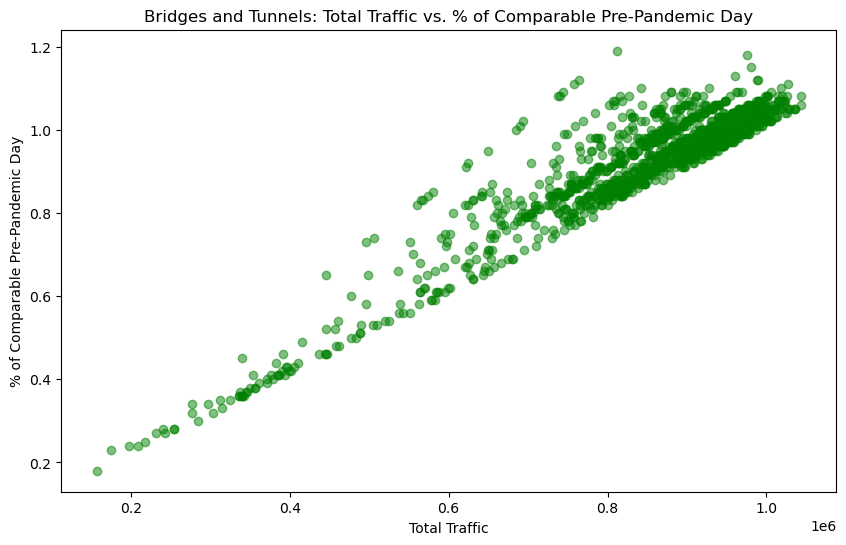

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Bridges and Tunnels: Total Traffic'], df['Bridges and Tunnels: % of Comparable Pre-Pandemic Day'], color='green', alpha=0.5)
plt.title('Bridges and Tunnels: Total Traffic vs. % of Comparable Pre-Pandemic Day')
plt.xlabel('Total Traffic')
plt.ylabel('% of Comparable Pre-Pandemic Day')
plt.show()


In [9]:
dfZone = pd.read_csv("taxi+_zone_lookup.csv")
dfZone.head()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [10]:
dfTrip = pd.read_csv("taxi_tripdata.csv")
dfTrip.head()

/tmp/ipykernel_2926523/1422887001.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  dfTrip = pd.read_csv("taxi_tripdata.csv")


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,1.0,2021-07-01 00:30:52,2021-07-01 00:35:36,N,1.0,74,168,1.0,1.20,6.0,0.5,0.5,0.00,0.0,NaN,0.3,7.30,2.0,1.0,0.0
1,2.0,2021-07-01 00:25:36,2021-07-01 01:01:31,N,1.0,116,265,2.0,13.69,42.0,0.5,0.5,0.00,0.0,NaN,0.3,43.30,2.0,1.0,0.0
2,2.0,2021-07-01 00:05:58,2021-07-01 00:12:00,N,1.0,97,33,1.0,0.95,6.5,0.5,0.5,2.34,0.0,NaN,0.3,10.14,1.0,1.0,0.0
3,2.0,2021-07-01 00:41:40,2021-07-01 00:47:23,N,1.0,74,42,1.0,1.24,6.5,0.5,0.5,0.00,0.0,NaN,0.3,7.80,2.0,1.0,0.0
4,2.0,2021-07-01 00:51:32,2021-07-01 00:58:46,N,1.0,42,244,1.0,1.10,7.0,0.5,0.5,0.00,0.0,NaN,0.3,8.30,2.0,1.0,0.0


# Number of Trips for Each Borough

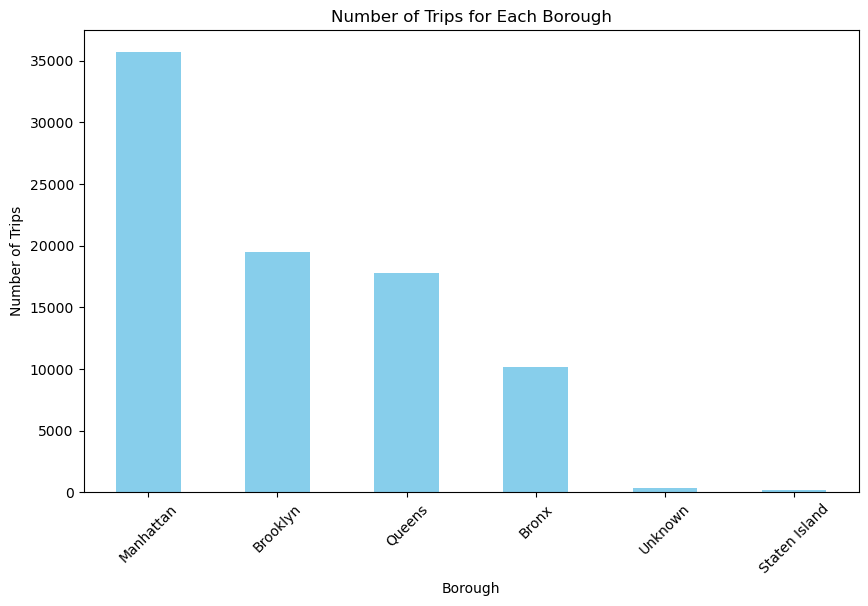

In [11]:
dfZone = pd.read_csv("taxi+_zone_lookup.csv")
dfTrip = pd.read_csv("taxi_tripdata.csv", low_memory=False)
merged_df = pd.merge(dfTrip, dfZone, how='left', left_on='PULocationID', right_on='LocationID')
borough_trip_counts = merged_df['Borough'].value_counts()
plt.figure(figsize=(10, 6))
borough_trip_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Trips for Each Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.show()


# Total Fare for Trips based on Distance

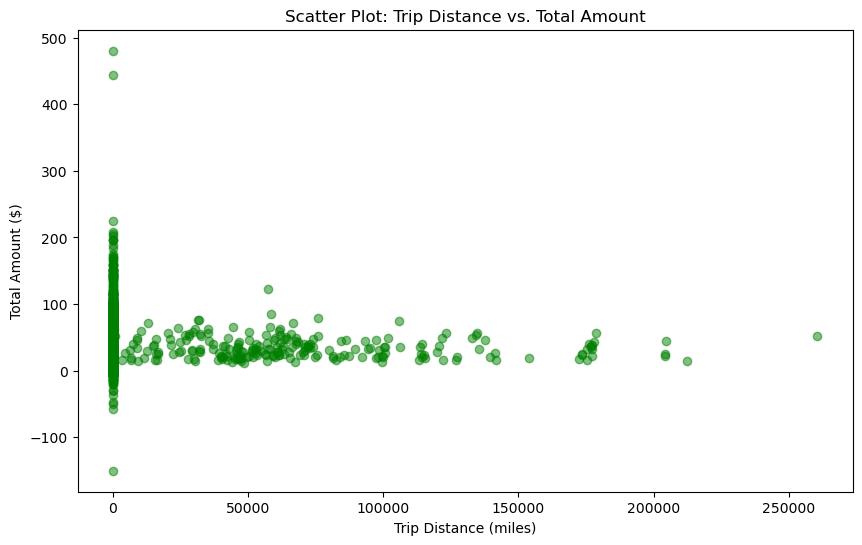

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['trip_distance'], merged_df['total_amount'], alpha=0.5, color='green')
plt.title('Scatter Plot: Trip Distance vs. Total Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Total Amount ($)')
plt.show()

# Distrubution of Payment based on Vendors

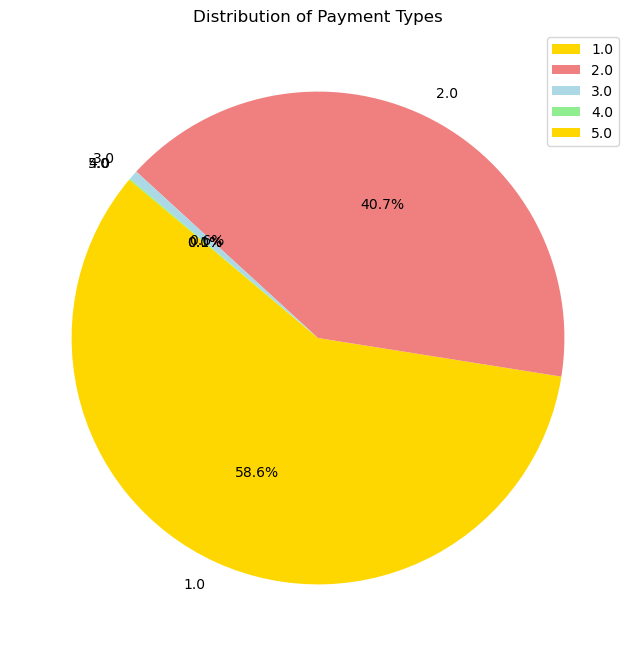

In [13]:
payment_type_distribution = merged_df['payment_type'].value_counts()
plt.figure(figsize=(8, 8))
colors = ['gold', 'lightcoral', 'lightblue', 'lightgreen']
plt.pie(payment_type_distribution, labels=payment_type_distribution.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Payment Types')
plt.legend(labels=payment_type_distribution.index, loc="best")
plt.show()


# Observations

* Manhattan has the highest number of taxi trips among all boroughs, indicating high taxi demand in the central business district.
* Queens and Brooklyn also have substantial taxi usage, while Staten Island has the least taxi activity.
* There seems to be a positive correlation between trip distance and the total amount, suggesting that longer trips tend to have higher fares.
* However, there are variations, and some shorter trips also have relatively high total amounts, possibly due to other factors like traffic conditions or additional charges.
* Credit card payments dominate the payment methods, constituting the majority of transactions.
* Cash payments are also notable but represent a smaller proportion compared to credit card transactions.
* Other payment types, such as "No Charge" and "Dispute," make up a relatively small percentage of overall transactions.
* These insights can help stakeholders, such as taxi service providers or city planners, understand patterns and trends in taxi usage and payments. Further analysis and exploration may be conducted to gain deeper insights into specific factors influencing trip dynamics and payment preferences, enabling more informed decision-making for optimizing taxi services in different boroughs.

# Possible Solutions

1. Enhance Taxi Availability in High-Demand Areas:
* Increase the number of taxis or rideshare vehicles in high-demand locations, such as Manhattan, to reduce wait times and meet customer demand effectively.
2. Promote Digital Payment Adoption:
* Encourage the adoption of digital payment methods like mobile wallets and contactless payments to streamline transactions, improve payment efficiency, and reduce reliance on cash.
3. Implement Dynamic Pricing Models:
* Introduce dynamic pricing strategies that adjust fares based on factors like demand, traffic conditions, and peak hours to optimize driver incentives and manage congestion.
4. Integrate with Public Transportation:
* Explore collaborations with public transportation systems to create a seamless travel experience, allowing passengers to transition easily between taxis and other modes of public transit.
5. Prioritize Sustainability and Innovation:
* Incentivize sustainable practices within the taxi industry, such as promoting environmentally friendly vehicles, and invest in innovative solutions to address evolving challenges and enhance overall service efficiency.